# Time Series Forecasting with ARIMA

In [2]:
pip install yfinance

     -------------------------------------- 59.2/59.2 kB 444.9 kB/s eta 0:00:00
     ------------------------------------ 112.2/112.2 kB 502.1 kB/s eta 0:00:00
     ------------------------------------ 499.4/499.4 kB 377.1 kB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [3]:
#collect data about the Google’s Stock Price:

import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())
1
import pandas as pd
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date       Open       High        Low      Close  Adj Close  \
246 2023-02-23  92.129997  92.129997  90.010002  91.070000  91.070000   
247 2023-02-24  89.629997  90.129997  88.860001  89.349998  89.349998   
248 2023-02-27  90.089996  90.449997  89.610001  90.099998  90.099998   
249 2023-02-28  89.540001  91.449997  89.519997  90.300003  90.300003   
250 2023-03-01  90.160004  91.199997  89.849998  90.510002  90.510002   

       Volume  
246  32423700  
247  31295600  
248  22724300  
249  30546900  
250  26272000  


In [4]:
data = data[["Date", "Close"]]  # We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:
print(data.head())

        Date       Close
0 2022-03-02  134.751495
1 2022-03-03  134.307999
2 2022-03-04  132.121994
3 2022-03-07  126.464500
4 2022-03-08  127.278503


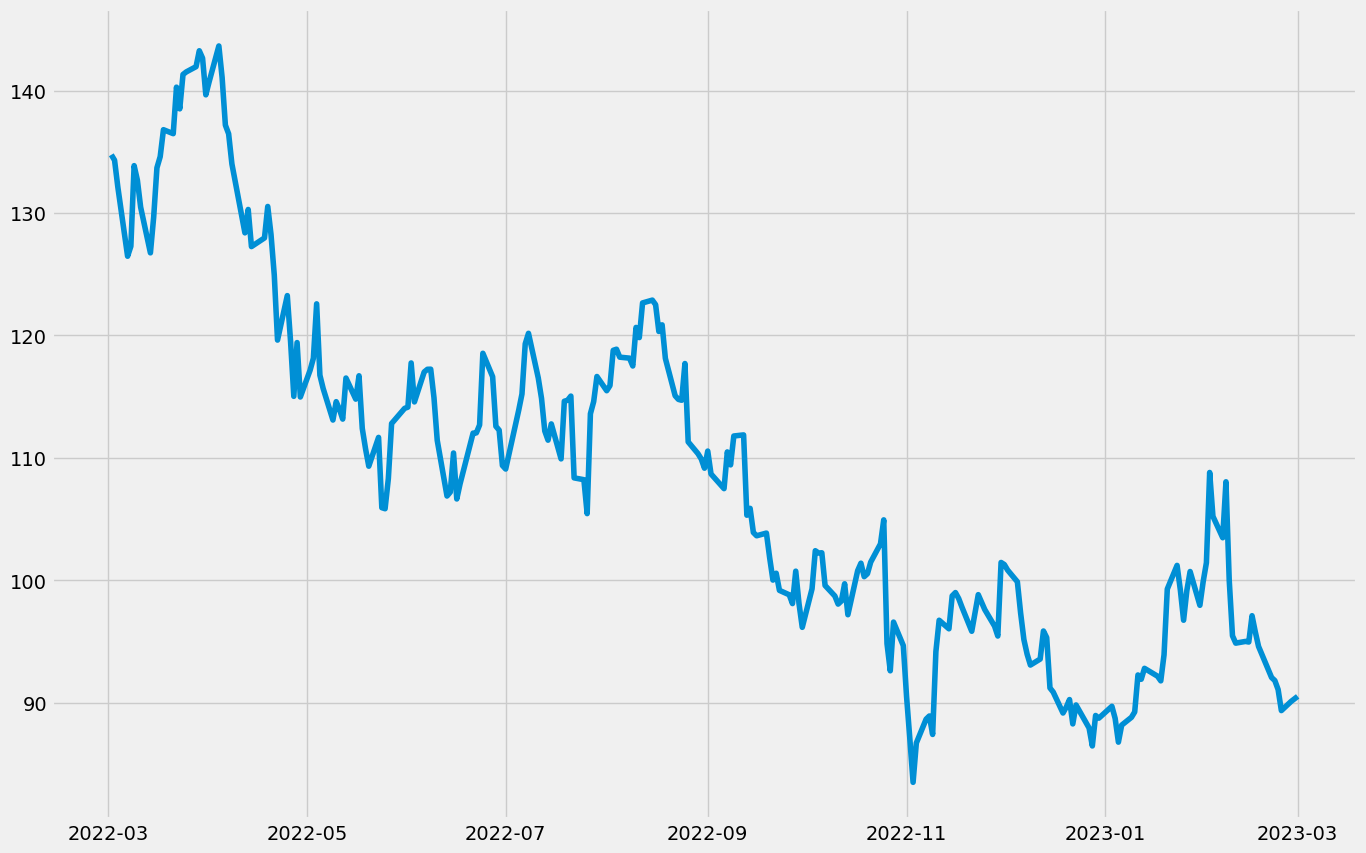

In [5]:
# visualize the close prices of Google 

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

# Using ARIMA for Time Series Forecasting


<Figure size 640x480 with 0 Axes>

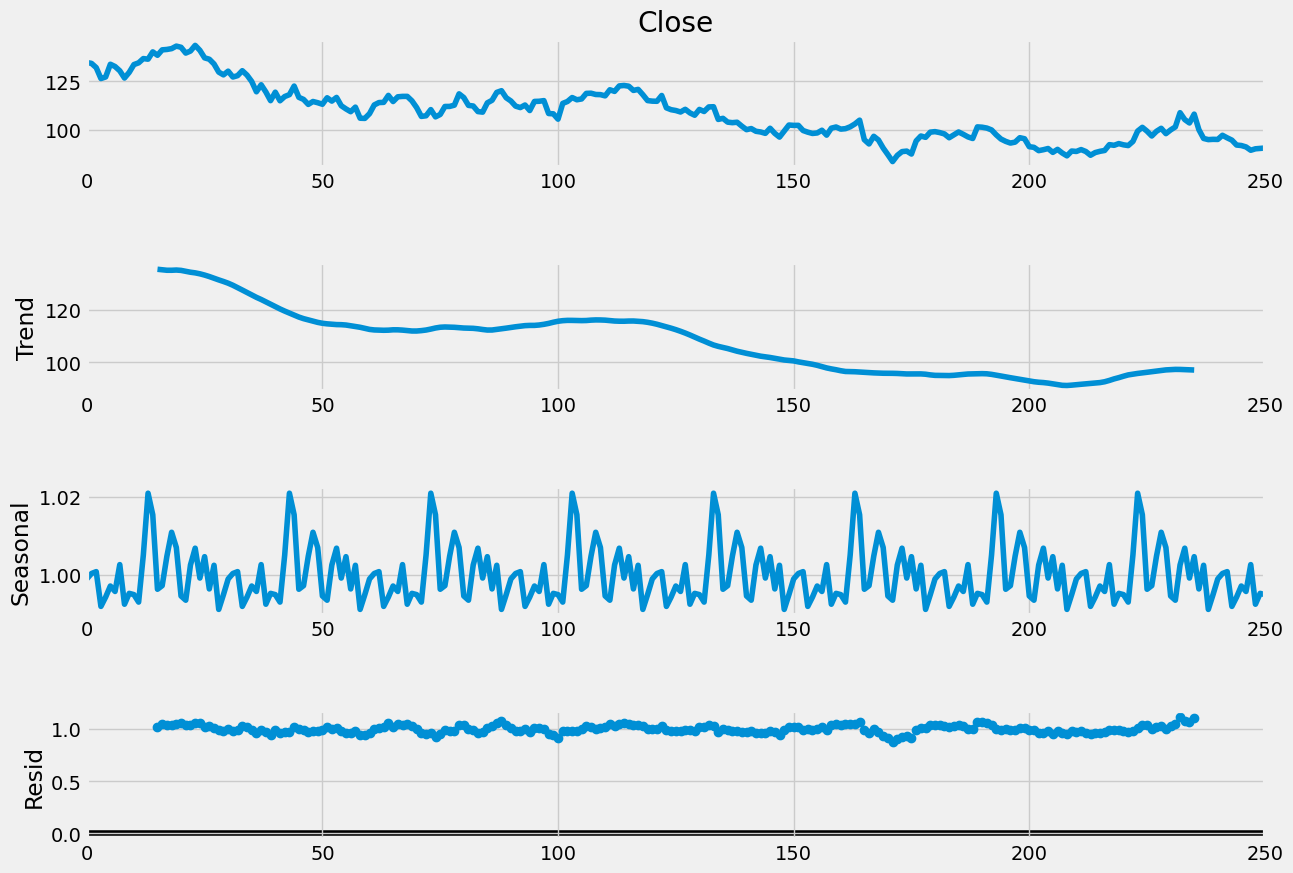

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

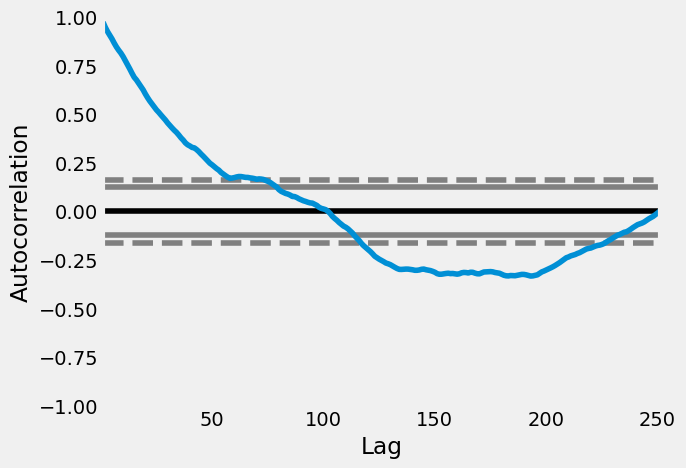

In [8]:
#Now here’s how to find the value of p:

pd.plotting.autocorrelation_plot(data["Close"])

C:\Users\toshiba\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


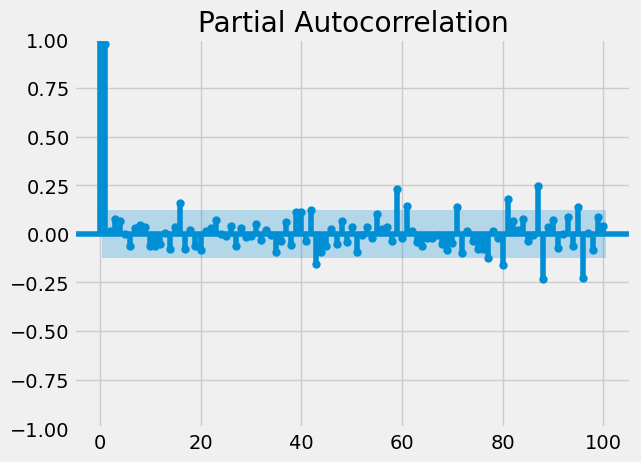

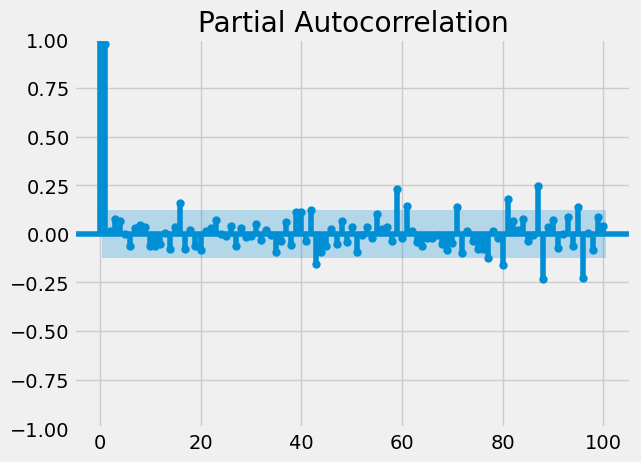

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = sm.tsa.ARIMA(data["Close"], order=(p,d,q))  
fitted = model.fit()  
print(fitted.summary())

C:\Users\toshiba\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\toshiba\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -603.184
Date:                Thu, 02 Mar 2023   AIC                           1222.369
Time:                        16:52:52   BIC                           1250.540
Sample:                             0   HQIC                          1233.707
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0021      0.406      0.005      0.996      -0.794       0.798
ar.L2          0.7739      0.366      2.116      0.034       0.057       1.491
ar.L3          0.0068      0.083      0.081      0.9

In [24]:
 #predict the values using the ARIMA model
predictions = fitted.predict()
print(predictions)

0        0.000000
1      134.751462
2      134.322975
3      132.240968
4      126.892576
          ...    
246     92.164073
247     91.204261
248     89.647130
249     90.270601
250     90.433050
Name: predicted_mean, Length: 251, dtype: float64


In [25]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\toshiba\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\toshiba\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\toshiba\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -590.549
Date:                            Thu, 02 Mar 2023   AIC                           1211.099
Time:                                    16:56:14   BIC                           1263.183
Sample:                                         0   HQIC                          1232.090
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0918      2.514      0.036      0.971      -4.836       5.020
ar.L2          0.7079      2.280   

In [26]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    90.187776
252    90.090545
253    90.317691
254    89.404438
255    88.802259
256    89.671817
257    89.883987
258    90.056947
259    90.252622
260    89.520617
261    88.465179
Name: predicted_mean, dtype: float64


<AxesSubplot:>

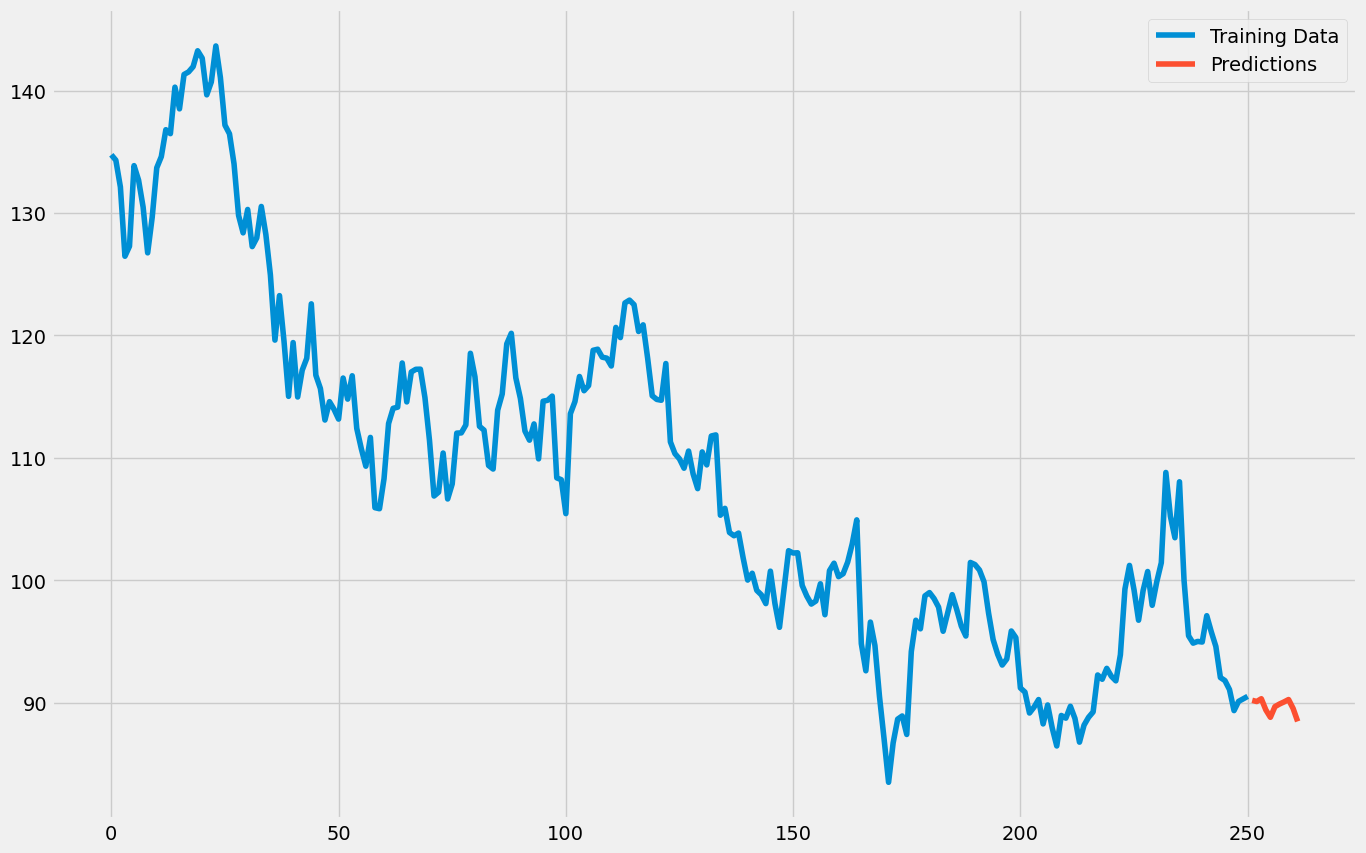

In [27]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")